# Modelo de evolución de un Pulsar Binario

# Cálculo Simbólico de $a$ en función de $e$

Dividiendo las ecuaciones para $\dot{a}$ y $\dot{e}$ podemos eliminar el tiempo de estas expresiones y encontrar una ecuación que relaciona directamente $a$ con $e$:
$$\frac{da}{de}=\frac{12}{19}a\frac{1+(73/24)e^2+(37/96)e^4}{e(1-e^2)[1+(121/304)e^2]}$$

Integrando esta relación respecto a $e$, encontramos:
$$
\int_{a_{0}}^{a}\frac{d\bar{a}}{\bar{a}}=\int_{e_{0}}^{e}\frac{12}{19}\frac{1+(73/24)\bar{e}^2+(37/96)\bar{e}^4}{\bar{e}(1-\bar{e}^2)[1+(121/304)\bar{e}^2]}\,d\bar{e}
$$
Por lo tanto,
$$
\ln \left(\frac{a}{a_{0}}\right)=\int_{e_{0}}^{e}\frac{12}{19}\frac{1+(73/24)\bar{e}^2+(37/96)\bar{e}^4}{\bar{e}(1-\bar{e}^2)[1+(121/304)\bar{e}^2]}\,d\bar{e}
$$

Despejando $a$, obtenemos la expresión
$$
\bar{a}= a_{0}\exp\left[\int_{e_{0}}^{e}\frac{12}{19}\frac{1+(73/24)\bar{e}^2+(37/96)\bar{e}^4}{\bar{e}(1-\bar{e}^2)[1+(121/304)\bar{e}^2]}\,d\bar{e}\right].
$$

Primero calcularemos la integral en la expresión anterior, usando `sympy`

In [1]:
from sympy import *
init_printing(use_unicode=True)

In [2]:
a0 = Symbol('a_0')
e0 = Symbol('e_0')
e = Symbol('e')
a = Symbol('a')

In [3]:
integrando = Rational(12,19)*((1+Rational(73,24)*e**2+Rational(37,96)*e**4)
                                 /(e*(1-e**2)*(1+Rational(121,304)*e**2)))

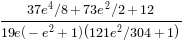

In [4]:
integrando

In [5]:
Integral = integrate(integrando,(e,e0,e))

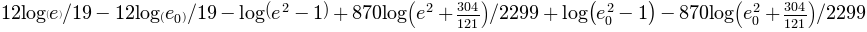

In [6]:
Integral

y ahora exponenciamos:

In [7]:
a = a0*exp(Integral)

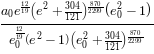

In [8]:
a

Si definimos
$$
g(e):= \frac{e^{12/19}}{1-e^2}\left(1+\frac{121}{304} \right)^{870/2299},
$$
entonces la solución para $a(e)$ puede escribirse como
$$
a(e)=a_{0}\frac{g(e)}{g(e_{0})}.
$$

Alternativamente, podemos intentar usar la función `dsolve` de `sympy` para resolver directamente la EDO determinada por la expresión de $da/dt$ descrita arriba:

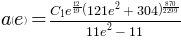

In [9]:
af = Function('a')
solucion = dsolve(Derivative(af(e),e)-af(e)*integrando,af(e))
solucion

La constante $C_1$ es determinada por la condición inicial $a(e_0)=a_0$ que, luego de ser reemplazada de vuelta en la solución, entrega la misma expresión encontrada por el otro método.

# Solución numérica

In [10]:
%matplotlib inline

In [11]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from __future__ import division

Usaremos la siguiente adimencionalización de las variables:
$$
\tilde{a}:= \frac{a}{R_{*}}, \qquad \tilde{t}:= \frac{c t}{R_{*}},
$$
con 
$$
R_{*}^3:=\frac{4 G^3 \mu M^2}{c^6}.
$$

Las ecuaciones *adimensionalizadas* que describen el decaimiento (y circularización de la órbita) son:

\begin{align}
\frac{d\tilde{a}}{d\tilde{t}} &= -\frac{16}{5}\frac{1}{\tilde{a}^3}\frac{1}{\left(1-e^2\right)^{7/2}}\left(1+\frac{73}{24}e^2+\frac{37}{96}e^4\right) ,\\
\frac{de}{d\tilde{t}} &= -\frac{76}{15}\frac{1}{\tilde{a}^4}\frac{e}{\left(1-e^2\right)^{5/2}}\left(1+\frac{121}{304}e^2\right) .
\end{align}

Como el sistema es de primer orden, basta definir el vector (bidimensional) solución $x$ por medio de $x[0]:=\tilde{a}$, $x[1]=e$.

Por lo tanto, la función `dotx`, que define la derivada temporal de $x$ (en nuestro caso, derivada con respecto al tiempo adimensionalizado $\tilde{t}$, es dada por

In [12]:
def dotx(x,t):
    a = x[0]
    e = x[1]
    return [-(16/(5*a**3))*(1+(73/24)*e**2+(37/96)*e**4)/((1-e**2)**(7/2)),
            -(76/(15*a**4))*e*(1+(121/304)*e**2)/((1-e**2)**(5/2))]

Usamos los datos del Pulsar de Hulse y Taulor, de acuerdo a lo por [Weisberg, Nice  y Taylor (2010)](http://dx.doi.org/10.1088/0004-637X/722/2/1030) (http://arxiv.org/abs/1011.0718v1):

In [13]:
T0_d = 0.322997448911 # periodo inicial, en días
e0 = 0.6171334 # excentricidad inicial
M_c = 1.3886 # masa de la compañera, en masas solares
M_p = 1.4398 # masa del pulsar, en masas solares
c = 299792458 # rapidez de la luz, en metros por segundo
MGcm3 = 4.925490947E-6 # MG/c^3, en segundos

Calculamos algunos otros parámetros que nos serán útiles:

In [14]:
m_sol = MGcm3*c # parametro de masa del Sol m=GM/c^2, en metros
M = M_c+M_p # masa total, en masas solares
mu = (M_c*M_p)/M # masa reducida, en masas solares
R_ast = m_sol*(4*mu*M**2)**(1/3) # R_\ast en metros
T0_s = T0_d*86400 # periodo inicial, en segundos

print('R_ast = '+str(R_ast)+' [m]')
print('T0 = '+str(T0_s) + ' [s]')

R_ast = 4176.03001482 [m]
T0 = 27906.9795859 [s]


Definimos también un par de funciones que relacionan el periodo orbital $T$ (en segundos) con el semieje mayor $a$ (de la coordenada relativa, en metros), y viceversa:

In [15]:
def a(T_s):
    return (m_sol*M*(c*T_s/(2*np.pi))**2)**(1/3)

def T(a_m):
    return (2*np.pi/c)*(a_m**3/(M*m_sol))**(1/2)

In [16]:
a0_m = a(T0_s) # a inicial, en metros
at0 = a0_m/R_ast # a tilde inicial
print('a0 = '+str(a0_m)+' m')
print('at0 = '+str(at0))

a0 = 1949123981.98 m
at0 = 466740.893878


Dado que aquí resolveremos el sistema de ecuaciones dos veces (con distintas condiciones iniciales), definiremos una función que nos entrega todas las soluciones:

In [17]:
def solucion(x0,tt_int):
    print 'Se resuelve con at0 = %2.f y e0 = %2.f'%(x0[0],x0[1])
    sol = odeint(dotx,x0,tt_int)
    at_todos = sol[:,0]
    # verifica si at llega a 2. En caso positivo corta el arreglo de soluciones
    restriccion = np.where(at_todos<2)[0]
    if len(restriccion) is not 0:
        pos_ttmax = restriccion[0] # determina el tiempo en el que at=2
        print('Acortando intervalo a tt_max = '+str(tt_int[pos_ttmax]))
    else: 
        pos_ttmax = len(tt_int)
    tt = tt_int[:pos_ttmax]
    t_a = tt*R_ast/c/31557600 # el tiempo, en años
    at = sol[:pos_ttmax,0]
    e = sol[:pos_ttmax,1]
    a_m = at*R_ast # solución de a, en metros
    T_s = T(a_m) # solución de T, en segundos
    return tt,t_a,at,e,a_m,T_s

# Primera integracion: hasta el colapso final!

In [18]:
tt_int_max = 10**22 # tiempo adimensional máximo de integración. Con este valor se llega hasta a=2
tt_int = np.linspace(0,tt_int_max,100000) # tiempos en los que se integrará el sistema
print('tt_int_max = '+str(tt_int_max))
x0 = [at0,e0] # valores iniciales
tt,t_a,at,e,a_m,T_s = solucion(x0,tt_int) # calcula y asigna valores de la solución

tt_int_max = 10000000000000000000000
Se resuelve con at0 = 466741 y e0 =  1
Acortando intervalo a tt_max = 6.81206812068e+20


/usr/local/lib/python2.7/dist-packages/scipy/integrate/odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


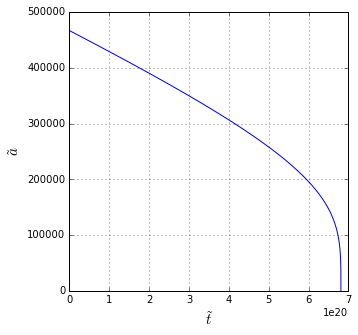

In [19]:
fig,eje = plt.subplots(1,1,figsize=(5,5))
eje.plot(tt,at)
eje.set_xlabel(r'$\tilde{t}$',fontsize=15)
eje.set_ylabel(r'$\tilde{a}$',fontsize=15)
plt.grid()

Como vemos, dadas las condiciones iniciales, se requiere un tiempo adimensionalizado del orden de $10^{21}$ para que el sistema colapse (suponiendo que el modelo es válido incluso a pequeñas distancias, cosa que en realidad no es cierta).

A continuación, graficamos las cantidades físicas (con dimensiones):

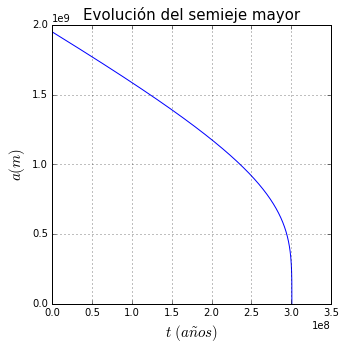

In [20]:
fig,eje = plt.subplots(1,1,figsize=(5,5))
eje.plot(t_a,a_m)
eje.set_title(u'Evolución del semieje mayor',fontsize=15)
eje.set_xlabel(r'$t\ (a\~nos)$',fontsize=15)
eje.set_ylabel(r'$a (m)$',fontsize=15)
plt.grid()

Vemos entonces que el tiempo de colapso es del orden de $10^8$ años.

Podemos también graficar cómo evoluciona la excentricidad:

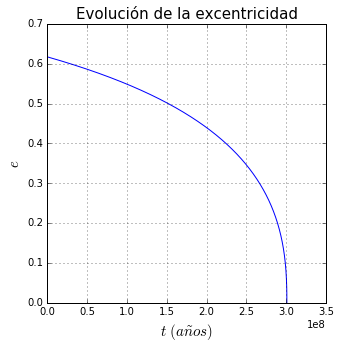

In [21]:
fig,eje = plt.subplots(1,1,figsize=(5,5))
eje.plot(t_a,e)
eje.set_title(u'Evolución de la excentricidad',fontsize=15)
eje.set_xlabel(r'$t\ (a\~nos)$',fontsize=15)
eje.set_ylabel(r'$e$',fontsize=15)
plt.grid()

Finalmente, graficamos la evolución del periodo orbital del sistema:

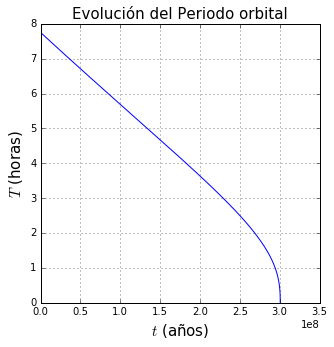

In [22]:
T_h = T_s/3600. # periodo orbital, en horas
plt.figure(figsize=(5,5))
plt.plot(t_a,T_h)
plt.title(u'Evolución del Periodo orbital',fontsize=15)
plt.xlabel(u'$t$ (años)',fontsize=15)
plt.ylabel(r'$T$ (horas)',fontsize=15)
plt.grid()

# Graficando la dependencia de $a$ con $e$

Primero definimos la función $g(e)$ y la graficamos

In [23]:
def g(e):
    return e**(12/19)*(1+121*e**2/304)**(870/2299)/(1-e**2)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


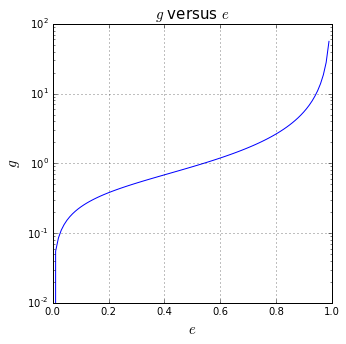

In [24]:
fig,eje= plt.subplots(1,1,figsize=(5,5))
ee = np.linspace(0,1,100)
eje.plot(ee,g(ee))
eje.set_yscale('log')
eje.set_title(r'$g$ versus $e$',fontsize=15)
eje.set_xlabel(r'$e$',fontsize=15)
eje.set_ylabel(r'$g$',fontsize=15)
#plt.legend(loc='best')
plt.grid()

Ahora graficamos $a$ en términos de $e$, tanto para la solución analítica como numérica

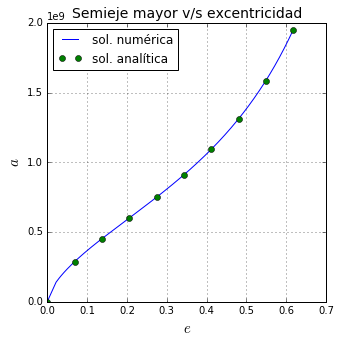

In [25]:
fig,eje= plt.subplots(1,1,figsize=(5,5))
eje.plot(e,at*R_ast, label=u'sol. numérica')
ee = np.linspace(min(e),e0,10)
a_an = a0_m*g(ee)/g(e0)
eje.plot(ee,a_an,'o',label=u'sol. analítica')
eje.set_title(u'Semieje mayor v/s excentricidad',fontsize=14)
eje.set_xlabel(r'$e$',fontsize=15)
eje.set_ylabel(r'$a$',fontsize=15)
plt.legend(loc='best')
plt.grid()

Como vemos, en el tiempo de observación del pulsar binario, aproximadamente 30 años, el decaimiento tanto de $a$ como $e$ será en la práctica a una tasa constante (línea recta en el gráfico en función del tiempo).

Resolvemos nuevamente el sistema, pero sólo en el intervalo de tiempo de 30 años:

In [26]:
t_max_a = 30 # tiempo de integración, en años
tt_int_max = 31557600*c*t_max_a/R_ast #tiempo adimensional máximo de integración

tt_int = np.linspace(0,tt_int_max,100000)
print('tt_int_max = '+str(tt_int_max))

tt,t_a,at,e,a_m,T_s = solucion(x0,tt_int)

tt_int_max = 6.79645292707e+13
Se resuelve con at0 = 466741 y e0 =  1


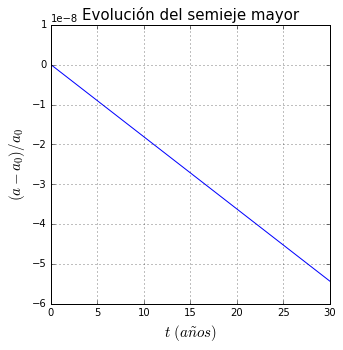

In [27]:
fig,eje = plt.subplots(1,1,figsize=(5,5))
eje.plot(t_a,at/at0-1)
eje.set_title(u'Evolución del semieje mayor',fontsize=15)
eje.set_xlabel(r'$t\ (a\~nos)$',fontsize=15)
eje.set_ylabel(r'$(a-a_0)/a_0$',fontsize=15)
plt.grid()

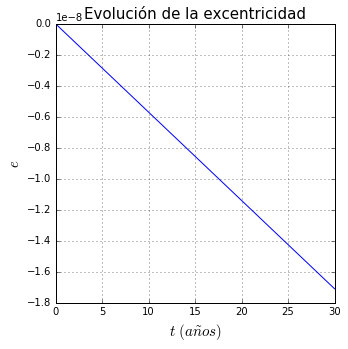

In [28]:
fig,eje = plt.subplots(1,1,figsize=(5,5))
eje.plot(t_a,e-e0)
eje.set_title(u'Evolución de la excentricidad',fontsize=15)
eje.set_xlabel(r'$t\ (a\~nos)$',fontsize=15)
eje.set_ylabel(r'$e$',fontsize=15)
plt.grid()

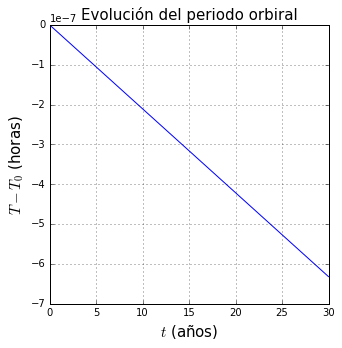

In [29]:
T_h = T_s/3600. # periodo orbital, en horas

fig,eje = plt.subplots(1,1,figsize=(5,5))
eje.plot(t_a,T_h-T_h[0])
eje.set_title(u'Evolución del periodo orbiral',fontsize=15)
eje.set_xlabel(u'$t$ (años)',fontsize=15)
eje.set_ylabel(r'$T-T_0$ (horas)',fontsize=15)
plt.grid()

Este comportamiento implica que en este intervalo de tiempo de aproximadamente 30 años los valores de $\dot{T}$, $\dot{a}$ y $\dot{e}$ pueden considerarse constantes. Con el valor de $\dot{T}$ podemos modelar el retardo acumulado en el movimiento orbital del sistema. Si $\dot{T}=$ cte. entonces el tiempo transcurrido hasta completar la $n$-ésima revolución es dado por
\begin{equation}
t_n=nT_0+\dot{T}T_0\frac{n(n-1)}{2}+O(\dot{T}{}^2).
\end{equation}
Por lo tanto, el *retardo* respecto al valor newtoniano ($t_n^{\rm Newton}=nT_0$), luego de $n$ revoluciones es dado por
\begin{equation}
(\Delta t)_n=\dot{T}T_0\frac{n(n-1)}{2}+O(\dot{T}{}^2).
\end{equation}

El valor de $\dot{T}$ puede ser evaluado usando la función dotx que definimos previamente, y con la relación
\begin{equation}
\dot{T}=\frac{3}{2}\frac{c}{R_\ast}\frac{T}{\tilde{a}}\frac{d\tilde{a}}{d\tilde{t}}
\end{equation}

In [30]:
dota = dotx(x0,0)[0]
dotT = (3/2)*(c/R_ast)*(T0_s/at0)*dota
print('dT/dt= ' + str(dotT))

dT/dt= -2.40256023445e-12


Este valor concuerda con el reportado por [Weisberg, Nice y Taylor (2010)](http://dx.doi.org/10.1088/0004-637X/722/2/1030]) (http://arxiv.org/abs/1011.0718v1), ver ec. (4).

Para comparar con los datos observacionales, cargamos los valores del retardo acumulado, obtenidos a partir del [gráfico original de Wiesberg, Nice y Taylor (2010)](http://arxiv.org/e-print/1011.0718v1) usando [WebPlotDigitizer](http://arohatgi.info/WebPlotDigitizer/app/) para extraer los valores.

In [31]:
data = np.genfromtxt('data-HT.txt')
t_exp = data[:,0]-data[0,0]
Delta_t_exp = data[:,1]

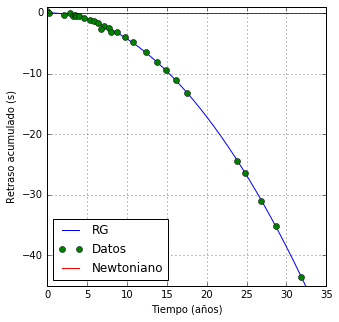

In [32]:
fig,eje = plt.subplots(1,1,figsize=(5,5))
n = np.arange(40000)
t_n = (n*T0_s+dotT*T0_s*n*(n-1)/2.)/31557600. # tiempo, en años
Delta_t_n = dotT*T0_s*n*(n-1)/2 #retraso acumulado, en segundos
eje.plot(t_n,Delta_t_n, label='RG')
eje.hlines(0,0,40, color='red',label='Newtoniano')
eje.set_xlabel(u'Tiempo (años)')
eje.set_ylabel(r'Retraso acumulado (s)')
eje.set_xlim(0,35)
eje.set_ylim(-45,1)
plt.plot(t_exp,Delta_t_exp,'o',label='Datos')
eje.legend(loc=3)
plt.grid()

not bad :-)

Now it is better! n.n